In [1]:
### Random Seed
from numpy.random import seed
seed(1)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import csv

In [3]:
df = pd.read_csv('belt_sensor_all.csv')
print(df.shape)
df.head(2)

(108170, 22)


,Unnamed: 0,Pid,timestamp,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,...,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
0,0,P1_BS,3.00,-84.23,-994.63,8.06,-0.37,-2.62,1.65,311.28,...,2.08,-3.23,-4.33,-68.12,-970.46,150.15,1.83,0.24,0.61,Downstairs
1,1,P1_BS,3.01,-86.43,-1004.15,16.85,-0.18,-3.17,0.85,301.76,...,6.77,3.05,-3.78,-73.24,-978.52,140.62,0.55,-0.24,0.31,Downstairs


In [4]:
df.groupby('Pid').size()

Pid
P1_BS            12278
P2_BS            13016
P3_BS            13016
P4_BS            12946
P5_BS            13016
p10_all_BS123     8825
p11_all_BS123     8598
p6_all_BS123      8825
p7_all_BS123      8825
p8_all_BS123      8825
dtype: int64

In [5]:
### Low Pass filter 
from scipy import signal
def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [6]:
#low pass filter
lowpass_filtred=[]
dfm=df[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
for column in dfm.columns:# iterate over each column in raw_df
    cutoff_frequency = 15.0
    sample_rate=100
    t_signal=np.array(dfm[column]) #copie the signal values in 1D numpy array
    y = butter_lowpass_filter(t_signal,cutoff_frequency,sample_rate/2) 
    lowpass_filtred.append(y)
lowpass=pd.DataFrame(lowpass_filtred)
lowpass=lowpass.T
lowpass.columns=['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']
df1=df[['Pid','timestamp']]
df_filtred=pd.concat([df1,lowpass],axis=1)
df_filtred['Label']=df['Label']

In [7]:
df_filtred['Label'].value_counts()

Upstairs      29345
Downstairs    25030
Walking       19440
Standing      12180
Sitting       11265
Laying        10910
Name: Label, dtype: int64

Class Counts:
 Upstairs      29345
Downstairs    25030
Walking       19440
Standing      12180
Sitting       11265
Laying        10910
Name: Label, dtype: int64


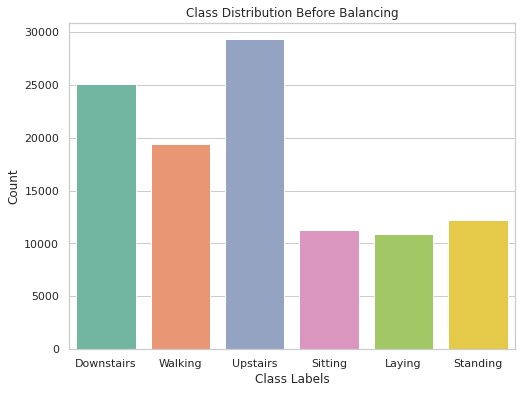

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Checking class balance
class_counts = df_filtred['Label'].value_counts()
print("Class Counts:\n", class_counts)

# Plotting class balance
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='Label', data=df_filtred, palette="Set2")
plt.title('Class Distribution Before Balancing')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# # Displaying percentages on top of the bars
# total = len(df_filtred['Label'])
# for i, count in enumerate(class_counts):
#     plt.text(i, count + 0.1, f'{count/total*100:.2f}%', ha='center')

# Save the plot to a file if needed
# plt.savefig('class_balance_plot.png')

# Show the plot
plt.show()


In [9]:
from imblearn.over_sampling import SMOTE
# split data into input and output elements
X = df_filtred[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy',
       'S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = df_filtred[['Label']]

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

df_Smoted=pd.concat([Xo,yo],axis=1)
print(df_Smoted.shape)
df_Smoted.head(2)

(176070, 19)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
0,-84.222490,-994.627346,8.055153,-0.370396,-2.620791,1.649596,311.291489,-1061.332673,81.294603,2.077435,-3.234044,-4.329407,-68.121248,-970.461276,150.138268,1.829730,0.240081,0.610366,Downstairs
1,-88.069874,-998.773910,11.651440,-0.282880,-3.161370,0.810362,301.127326,-1027.592784,86.576920,6.452058,2.962058,-3.769370,-70.387323,-977.643665,146.687971,0.477777,-0.317638,0.282808,Downstairs


Class Counts:
 Downstairs    29345
Walking       29345
Upstairs      29345
Sitting       29345
Laying        29345
Standing      29345
Name: Label, dtype: int64


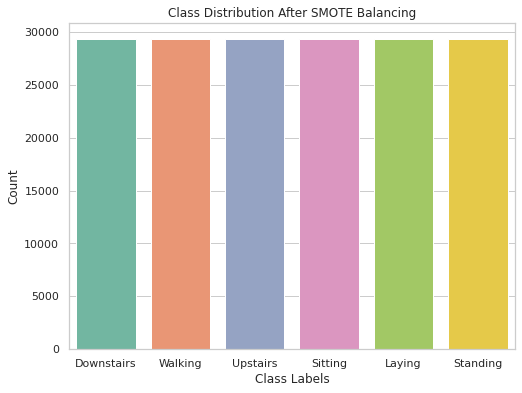

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Checking class balance
class_counts = df_Smoted['Label'].value_counts()
print("Class Counts:\n", class_counts)

# Plotting class balance
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='Label', data=df_Smoted, palette="Set2")
plt.title('Class Distribution After SMOTE Balancing')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# # Displaying percentages on top of the bars
# total = len(df_filtred['Label'])
# for i, count in enumerate(class_counts):
#     plt.text(i, count + 0.1, f'{count/total*100:.2f}%', ha='center')

# Save the plot to a file if needed
# plt.savefig('class_balance_plot.png')

# Show the plot
plt.show()


In [11]:
df_Smoted['Label_id']=df_Smoted['Label']
dff=df_Smoted.replace({'Label_id': {'Downstairs':0,'Walking':1,'Upstairs':2,
                        'Sitting':3,'Laying':4,'Standing':5}})
dff.head(2)

,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label,Label_id
0,-84.222490,-994.627346,8.055153,-0.370396,-2.620791,1.649596,311.291489,-1061.332673,81.294603,2.077435,-3.234044,-4.329407,-68.121248,-970.461276,150.138268,1.829730,0.240081,0.610366,Downstairs,0
1,-88.069874,-998.773910,11.651440,-0.282880,-3.161370,0.810362,301.127326,-1027.592784,86.576920,6.452058,2.962058,-3.769370,-70.387323,-977.643665,146.687971,0.477777,-0.317638,0.282808,Downstairs,0


In [12]:
# Label encoding
df_filtred['Label_id']=df_filtred['Label']
dff=df_filtred.replace({'Label_id': {'Downstairs':0,'Walking':1,'Upstairs':2,
                        'Sitting':3,'Laying':4,'Standing':5}})
## Normalize/Standardize data
from sklearn.preprocessing import StandardScaler, LabelEncoder
X = dff[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = dff['Label_id']
scaler = StandardScaler()
dx = scaler.fit_transform(X)

df_scaled = pd.DataFrame(data = dx, columns = X.columns)
df_scaled['Label_id'] = y.values

print(df_scaled.shape)
df_scaled.tail(2)

(108170, 19)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label_id
108168,-1.184801,-1.246834,1.052031,-1.358904,1.442018,0.213337,-0.374825,0.984964,0.103477,-0.647672,0.728023,0.554009,-0.495231,-0.095276,0.177837,0.934893,3.810924,-1.627844,5
108169,-0.948608,-2.459766,0.808399,-2.407089,1.100033,0.209530,-0.625947,0.657764,0.264402,-0.508701,1.039492,0.488135,-0.641922,-0.120628,0.178026,0.853266,3.767479,-1.420029,5


In [13]:
## Segmentation (window Preparation)
import scipy.stats as stats
Fs = 100
segment_size = 500 # fs*3 # window size=n_time steps=frame size
step_size = 50  #  Fs/2 # step size is related to window overlap
n_features = 18
def get_segments(df, segment_size, step_size):

    segments = []
    labels = []
    
    for i in range(0, len(df) - segment_size - 1, step_size):
        S1Ax = df_scaled['S1_Ax'].values[i: i + segment_size]
        S1Ay = df_scaled['S1_Ay'].values[i: i + segment_size]
        S1Az = df_scaled['S1_Az'].values[i: i + segment_size]
        S1Gx = df_scaled['S1_Gx'].values[i: i + segment_size]
        S1Gy = df_scaled['S1_Gy'].values[i: i + segment_size]
        S1Gz = df_scaled['S1_Gz'].values[i: i + segment_size]
        
        S2Ax = df_scaled['S2_Ax'].values[i: i + segment_size]
        S2Ay = df_scaled['S2_Ay'].values[i: i + segment_size]
        S2Az = df_scaled['S2_Az'].values[i: i + segment_size]
        S2Gx = df_scaled['S2_Gx'].values[i: i + segment_size]
        S2Gy = df_scaled['S2_Gy'].values[i: i + segment_size]
        S2Gz = df_scaled['S2_Gz'].values[i: i + segment_size]
        
        
        S3Ax = df_scaled['S3_Ax'].values[i: i + segment_size]
        S3Ay = df_scaled['S3_Ay'].values[i: i + segment_size]
        S3Az = df_scaled['S3_Az'].values[i: i + segment_size]
        S3Gx = df_scaled['S3_Gx'].values[i: i + segment_size]
        S3Gy = df_scaled['S3_Gy'].values[i: i + segment_size]
        S3Gz = df_scaled['S3_Gz'].values[i: i + segment_size]
        
          # Retrieve the most often used label in this segment
        # label = stats.mode(df_scaled['Label_id'][i: i + segment_size])[0][0] ## [0][0] shows the current sequence
        label = np.unique(df_scaled['Label_id'][i: i + segment_size])[0]

        #We used the dstack() to ensure that each array is stacked in such a way that
        #the features are separated in the third dimension, as we would prefer.
        segments.append(np.dstack([S1Ax, S1Ay, S1Az,S1Gx,S1Gy,S1Gz,S2Ax,S2Ay,S2Az, S2Gx,S2Gy,S2Gz,S3Ax,S3Ay,S3Az,S3Gx,S3Gy,S3Gz]))
        labels.append(label)

    # Bring the segments into a better shape
    segments=np.asarray(segments, dtype= np.float32).reshape(-1, segment_size, n_features)
    labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
        
    return segments, labels


In [14]:
X, y = get_segments(df_scaled, segment_size, step_size)

In [15]:
X.shape,y.shape, y.shape[0]

((2154, 500, 18), (2154, 6), 2154)

In [16]:
# reshape data into time steps of sub-sequences

n_steps, n_length = 10, 50
df_X = X.reshape((X.shape[0], n_steps, n_length, n_features))
n_outputs = y.shape[1] #n_outputs= 6

In [17]:
from sklearn.model_selection import train_test_split
# split data into training set and test set
X_train_main, X_test, y_train_main, y_test = train_test_split(df_X, y,test_size=0.20, random_state=42)

# split training set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_main,y_train_main,test_size=0.20,random_state=42)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.layers import Conv1D  # Updated import
from keras.layers import MaxPooling1D  # Updated import

2023-12-03 11:37:45.106752: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 11:37:45.836026: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 11:37:48.084579: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 11:37:48.094094: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 11:37:48.481867: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Input, Dense, TimeDistributed, Conv1D, Dropout, MaxPooling2D, Flatten, LSTM
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, GlobalAveragePooling3D


In [43]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Input, Dense, TimeDistributed, Conv1D, Dropout, MaxPooling2D, Flatten, LSTM
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, GlobalAveragePooling3D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, Activation

def create_combined_model(input_shape, n_outputs=n_outputs):
    # Shared Input Layer
    input_layer = Input(shape=input_shape)

    # CNN-LSTM Branch
    cnn_lstm_branch = TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu'))(input_layer)
    cnn_lstm_branch = TimeDistributed(Dropout(0.5))(cnn_lstm_branch)
    cnn_lstm_branch = TimeDistributed(MaxPooling1D(pool_size=2))(cnn_lstm_branch)
    cnn_lstm_branch = TimeDistributed(Flatten())(cnn_lstm_branch)
    cnn_lstm_branch = LSTM(100, dropout=0.5, recurrent_dropout=0.5, kernel_regularizer=l2(0.01))(cnn_lstm_branch)

    # Transformer Encoder Branch
    transformer_branch = LayerNormalization(epsilon=1e-6)(input_layer)

    # Parameters for Transformer
    num_transformer_blocks = 4
    d_model = 256
    num_heads = 8
    ffn_units = 1012
    ff_dim = 4
    mlp_dropout = 0
    dropout_rate = 0.15

    for _ in range(num_transformer_blocks):
        # Multi-Head Self-Attention
        transformer_branch = MultiHeadAttention(key_dim=d_model, num_heads=num_heads, dropout=dropout_rate)(transformer_branch, transformer_branch)
        transformer_branch = Dropout(dropout_rate)(transformer_branch)

        # Project input_layer to the same dimension as transformer_branch
        projection_layer = TimeDistributed(Dense(d_model))(input_layer)

        # Concatenate transformer_branch and projection_layer along the last axis
        transformer_branch = Concatenate(axis=-1)([transformer_branch, projection_layer])

        # Feed-Forward Part
        transformer_branch = TimeDistributed(Dense(ffn_units, activation="relu"))(transformer_branch)
        transformer_branch = Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(transformer_branch)
        transformer_branch = Dropout(mlp_dropout)(transformer_branch)
        transformer_branch = LayerNormalization(epsilon=1e-6)(transformer_branch + transformer_branch)


    transformer_branch = TimeDistributed(Dense(18, activation="relu"))(transformer_branch)

    # Combine the branches
    merged = Concatenate(axis=-1)([cnn_lstm_branch, Flatten()(transformer_branch)])

    # Output Layer
    output_layer = Dense(n_outputs, activation='softmax')(merged)

    # Create the final model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model with the desired optimizer, loss, and metrics
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Assuming your segment shape is (10, 50, 18)
input_shape = (10, 50, 18)
n_outputs = 6  # Replace with your actual number of output classes
combined_model = create_combined_model(input_shape, n_outputs)
combined_model.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 10, 50, 18)]         0         []                            
                                                                                                  
 layer_normalization_31 (La  (None, 10, 50, 18)           36        ['input_7[0][0]']             
 yerNormalization)                                                                                
                                                                                                  
 multi_head_attention_25 (M  (None, 10, 50, 18)           153618    ['layer_normalization_31[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_31

 tf.__operators__.add_27 (T  (None, 10, 50, 4)            0         ['dropout_62[0][0]',          
 FOpLambda)                                                          'dropout_62[0][0]']          
                                                                                                  
 layer_normalization_34 (La  (None, 10, 50, 4)            8         ['tf.__operators__.add_27[0][0
 yerNormalization)                                                  ]']                           
                                                                                                  
 multi_head_attention_28 (M  (None, 10, 50, 4)            38916     ['layer_normalization_34[0][0]
 ultiHeadAttention)                                                 ',                            
                                                                     'layer_normalization_34[0][0]
                                                                    ']                            
          

In [44]:

# Training the combined model
history = combined_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_valid, y_valid)
)

# Evaluate the model on the test set
test_loss, test_accuracy = combined_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/20
44/44 [==============================] - 163s 4s/step - loss: 4.0983 - accuracy: 0.3374 - val_loss: 2.2559 - val_accuracy: 0.4406
Epoch 2/20
44/44 [==============================] - 156s 4s/step - loss: 1.5818 - accuracy: 0.5406 - val_loss: 1.4255 - val_accuracy: 0.4957
Epoch 3/20
44/44 [==============================] - 156s 4s/step - loss: 1.1314 - accuracy: 0.6531 - val_loss: 1.1976 - val_accuracy: 0.6348
Epoch 4/20
44/44 [==============================] - 156s 4s/step - loss: 0.9963 - accuracy: 0.7017 - val_loss: 1.0199 - val_accuracy: 0.7188
Epoch 5/20
44/44 [==============================] - 156s 4s/step - loss: 0.8126 - accuracy: 0.7859 - val_loss: 0.8338 - val_accuracy: 0.7681
Epoch 6/20
44/44 [==============================] - 156s 4s/step - loss: 0.6627 - accuracy: 0.8360 - val_loss: 0.7700 - val_accuracy: 0.7768
Epoch 7/20
44/44 [==============================] - 156s 4s/step - loss: 0.5723 - accuracy: 0.8766 - val_loss: 0.7934 - val_accuracy: 0.7826
Epoch 8/20
44

In [45]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

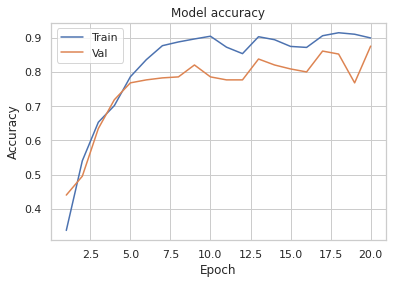

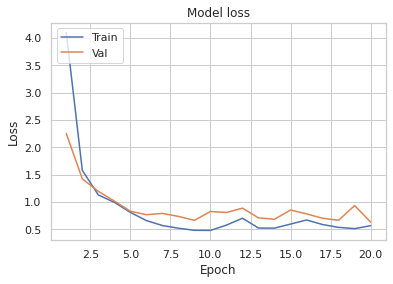

In [46]:
plot_learningCurve(history, 20)

In [47]:
# Make Predictions on test 
y_preds_test = combined_model.predict(X_test) #class Prediction 

y_preds_test[:3], #y_probs_test[:5]

14/14 [==============================] - 16s 1s/step


(array([[1.3728481e-02, 9.7974044e-01, 5.4134196e-03, 3.5377883e-04,
         3.3852301e-04, 4.2541503e-04],
        [1.5861295e-04, 1.6213975e-04, 9.8203284e-01, 1.7474450e-02,
         1.2270377e-04, 4.9302158e-05],
        [7.8661305e-01, 1.0300558e-03, 6.6381262e-04, 7.9291403e-02,
         2.0429920e-02, 1.1197179e-01]], dtype=float32),)

In [48]:
y_test[:5,]

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [49]:
y_pred_test=np.argmax(y_preds_test,axis=1) 
y_true_test=np.argmax(y_test,axis=1) 

y_true_test.shape, y_test.shape

((431,), (431, 6))

In [50]:
### Evaluate Model using accuracy 
from sklearn.metrics import accuracy_score,classification_report
print("Test  acc : {}".format(accuracy_score(y_true_test, y_pred_test)))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_true_test, y_pred_test))

Test  acc : 0.9048723897911833

 -------------Classification Report-------------

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.85      0.90        86
           2       0.91      0.97      0.94       123
           3       0.75      0.95      0.84        38
           4       0.85      0.84      0.85        49
           5       0.83      0.50      0.62        20

    accuracy                           0.90       431
   macro avg       0.88      0.84      0.85       431
weighted avg       0.91      0.90      0.90       431



In [51]:
y_pred_test = combined_model.predict(X_test) #class Prediction 

y_pred_test=np.argmax(y_pred_test,axis=1) 
y_true_test=np.argmax(y_test,axis=1) 

y_true_test.shape, y_pred_test.shape

14/14 [==============================] - 16s 1s/step


((431,), (431,))

In [52]:
import seaborn as sns
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_true_test,y_pred_test)
print(cm)
print(acc(y_true_test,y_pred_test))
print(classification_report(y_true_test,y_pred_test))

[[111   3   0   0   1   0]
 [  1  73  12   0   0   0]
 [  0   1 119   3   0   0]
 [  0   0   0  36   2   0]
 [  0   0   0   6  41   2]
 [  3   0   0   3   4  10]]
0.9048723897911833
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.85      0.90        86
           2       0.91      0.97      0.94       123
           3       0.75      0.95      0.84        38
           4       0.85      0.84      0.85        49
           5       0.83      0.50      0.62        20

    accuracy                           0.90       431
   macro avg       0.88      0.84      0.85       431
weighted avg       0.91      0.90      0.90       431



In [53]:
cf=np.empty((6,6))
for i in range(6):
    cf[i]=(cm[i]/np.sum(cm[i]))

In [54]:
# group_counts = ["{0:.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()]
labels = [f"{v1}" for v1 in group_percentages]
labels = np.asarray(labels).reshape(6,6)

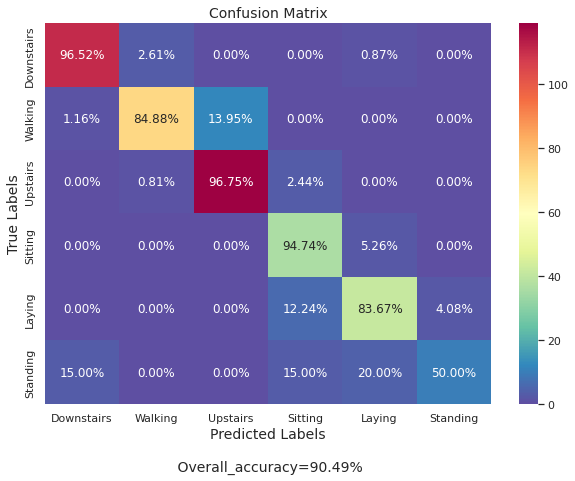

In [55]:
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
#sns.heatmap(cm, annot=labels,fmt="",cmap='RdYlBu_r',ax=ax)
sns.heatmap(cm, annot=labels,fmt="",cmap='Spectral_r',ax=ax)
ax.set_xlabel("Predicted Labels\n\n Overall_accuracy=""{0:.2%}".format((acc(y_true_test,y_pred_test))),size=14)
ax.set_ylabel("True Labels",size=14)
ax.set_title("Confusion Matrix",size=14)
ax.xaxis.set_ticklabels(['Downstairs','Walking','Upstairs','Sitting','Laying','Standing'])
ax.yaxis.set_ticklabels(['Downstairs','Walking','Upstairs','Sitting','Laying','Standing'])
plt.savefig('ConfusionMatrix_smart belt',dpi=1200, bbox_inches='tight')